In [3]:
import pandas as pd
import numpy as np
from __future__ import division
from math import ceil
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
data = pd.read_csv('/home/jeroen/Downloads/results-20160423-111403-cruz.csv')

In [44]:
data['sentiment'] = pd.Series(np.zeros(len(data)), index=data.index)

In [45]:
data.head()

,subreddit,body,created_utc,sentiment
0,2007scape,"Hi SantaCruZ3r,\n\nHave a look here and conta...",1461342161,0
1,AFL,"Look on the brightside, at least he doesn't su...",1461328952,0
2,Advice,I would want something waiting for me. Otherwi...,1461355322,0
3,AdviceAnimals,I love the conservative dilemmas too. There ar...,1461396590,0
4,AdviceAnimals,&gt;That's not what people believe. They are n...,1461328306,0


In [46]:
sid = SentimentIntensityAnalyzer()

In [47]:
for index, row in data.iterrows():
    data.set_value(index, 'sentiment', sid.polarity_scores(row['body'])['compound'])
    if index%int(len(data)/10) == 0:
        print str(ceil(index/(len(data)/100)))+'%'

0.0%
10.0%
20.0%
30.0%
40.0%
50.0%
60.0%
70.0%
80.0%
90.0%


In [48]:
data.tail()

,subreddit,body,created_utc,sentiment
2815,worldnews,"Yeah, either Clinton or Trump. Sanders and Cru...",1461314244,0.2534
2816,worldnews,He should run. I would vote for him over Ted C...,1461328063,0.0000
2817,worldnews,Not all of us just the crazy GOP loving Trump ...,1461353673,0.7096
2818,wow,"So the Mage Orb and the Cruz ""charger mount"" (...",1461372800,0.0000
2819,wow,Seems like the Diablo 3 Cruzader inspired WoW ...,1461329318,0.8591


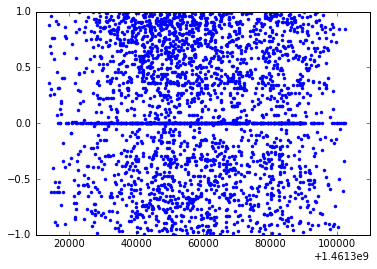

In [49]:
plt.plot(data['created_utc'], data['sentiment'], '.')
plt.show()

In [50]:
import scipy.signal

In [51]:
sentiment_resampled = scipy.signal.resample(data.sort_values('created_utc')['sentiment'], 7*2)

(-1, 1)

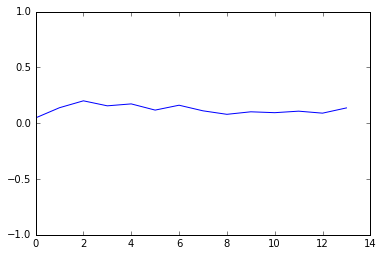

In [56]:
plt.plot(sentiment_resampled)
plt.ylim([-1, 1])